In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
full_data = pd.read_csv(r"03_18_21_Synthesis_Plus_Spectra")

# def function identifier
wavelength_columns = [col for col in full_data.columns if 'nm' in col]
wavelengths = [float(wavelength.replace("nm","")) for wavelength in wavelength_columns]

full_spectra = full_data[wavelength_columns]

In [26]:
samples = full_data[0:96]
samples['ethanol wtf'] = samples['ethanol wtf'].round(3)
samples_spectra = samples[wavelength_columns]

blanks = full_data[(full_data['pfh wtf']==0) & (full_data['dppc wtf']==0) & (full_data['dspepeg200 wtf']==0)]
blanks['ethanol wtf'] = blanks['ethanol wtf'].round(3)
blanks_spectra = blanks[wavelength_columns]

unique_ethanol_samples = samples['ethanol wtf'].unique()
unique_ethanol_blanks = blanks['ethanol wtf'].unique()
unique_ethanol_samples, unique_ethanol_blanks

<ipython-input-26-37e5e5929ac1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples['ethanol wtf'] = samples['ethanol wtf'].round(3)
<ipython-input-26-37e5e5929ac1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blanks['ethanol wtf'] = blanks['ethanol wtf'].round(3)


(array([0.111, 0.147, 0.184, 0.221, 0.258, 0.295, 0.332, 0.368, 0.405,
        0.442, 0.479, 0.516, 0.553, 0.589, 0.626, 0.663, 0.7  ]),
 array([0.111, 0.147, 0.184, 0.221, 0.258, 0.295, 0.332, 0.368, 0.405,
        0.442, 0.479, 0.516, 0.553, 0.589, 0.626, 0.663, 0.7  ]))

In [27]:
# # If just want to look at single blanked samples 
# def plot_blanked(sample_indexes):
#     for sample_index in sample_indexes: 
#         sample_single = samples.loc[sample_index]['ethanol wtf']
#         sample_spec = samples_spectra.loc[sample_index].tolist()

#         blank_single = blanks[blanks['ethanol wtf'].round(3) == samples.loc[sample_index]['ethanol wtf'].round(3)] 
#         blank_spec = blanks_spectra.loc[blank_single.index]

#         blanked_spec = sample_spec - blank_spec
#         plt.plot(wavelengths, blanked_spec[wavelength_columns].iloc[0])

In [28]:
# plot_blanked(samples.index)

In [29]:
blanked_samples = []
for sample_conc, blank_conc in zip(unique_ethanol_samples, unique_ethanol_blanks): #essentially to check enough blank concs exist to cover the samples
    print(sample_conc, blank_conc)
    if sample_conc == blank_conc: # checking to match the thing that is identifying what blank goes with what samples 
        unblanked_full = samples[samples['ethanol wtf']==blank_conc]
        unblanked_spectra = samples_spectra.loc[unblanked_full.index]
        
        blank_full = blanks[blanks['ethanol wtf']==blank_conc]
        blank_spectra = blanks_spectra.loc[blank_full.index]
        
        blanked_spectra = unblanked_spectra - blank_spectra.values
        blanked_samples.append(blanked_spectra)
    else: 
        pass

blanked_samples_spectra = pd.concat(blanked_samples)
blanked_samples = samples.copy() # making a new full one to add the new blanked spectra in
blanked_samples[wavelength_columns] = blanked_samples_spectra

0.111 0.111
0.147 0.147
0.184 0.184
0.221 0.221
0.258 0.258
0.295 0.295
0.332 0.332
0.368 0.368
0.405 0.405
0.442 0.442
0.479 0.479
0.516 0.516
0.553 0.553
0.589 0.589
0.626 0.626
0.663 0.663
0.7 0.7


In [71]:
UID_of_interest = []
for i, row in blanked_samples.iterrows():
    UID = row['UID']
    absorbs = row[wavelength_columns]
    absorb_nm = absorbs.loc['500.0nm']
    if absorb_nm < -0.01:
        print(UID)
        UID_of_interest.append(UID)
samples[samples['UID'].isin(UID_of_interest)]

S2_B4_03-19-2021_Right
S2_D3_03-19-2021_Right
S2_F1_03-19-2021_Right
S3_B8_03-19-2021_Right
S3_D1_03-19-2021_Right
S3_D8_03-19-2021_Right


,UID,dppc wtf,dspepeg200 wtf,pfh wtf,ethanol wtf,water wtf,Well,Labware,Slot,dppc-ethanol-stock uL,...,900.0nm,910.0nm,920.0nm,930.0nm,940.0nm,950.0nm,960.0nm,970.0nm,980.0nm,990.0nm
11,S2_B4_03-19-2021_Right,0.000075,0.000035,0.000000,0.516,0.484101,B4,Falcon 48 Well Plate 1500 ÂµL,2,30.000002,...,0.063,0.065,0.064,0.068,0.075,0.090,0.110,0.120,0.125,0.129
26,S2_D3_03-19-2021_Right,0.000075,0.000035,0.000417,0.516,0.483684,D3,Falcon 48 Well Plate 1500 ÂµL,2,30.000002,...,0.061,0.063,0.061,0.065,0.071,0.085,0.103,0.113,0.118,0.121
40,S2_F1_03-19-2021_Right,0.000075,0.000035,0.000833,0.516,0.483267,F1,Falcon 48 Well Plate 1500 ÂµL,2,30.000002,...,0.061,0.064,0.063,0.067,0.073,0.087,0.105,0.115,0.120,0.123
63,S3_B8_03-19-2021_Right,0.000075,0.000035,0.001667,0.516,0.482434,B8,Falcon 48 Well Plate 1500 ÂµL,3,30.000002,...,0.061,0.063,0.062,0.066,0.072,0.086,0.103,0.113,0.119,0.123
72,S3_D1_03-19-2021_Right,0.000075,0.000035,0.002083,0.516,0.482017,D1,Falcon 48 Well Plate 1500 ÂµL,3,30.000002,...,0.066,0.069,0.067,0.071,0.077,0.092,0.110,0.120,0.125,0.130
79,S3_D8_03-19-2021_Right,0.000075,0.000035,0.002500,0.516,0.481601,D8,Falcon 48 Well Plate 1500 ÂµL,3,30.000002,...,0.060,0.062,0.061,0.065,0.071,0.085,0.103,0.112,0.118,0.122


(-0.1, 0.1)

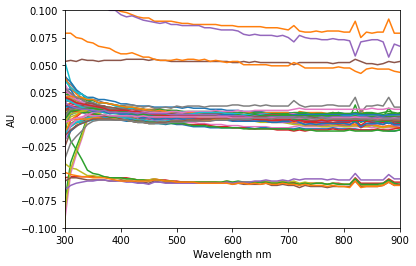

In [55]:
for i, row in blanked_samples_spectra.loc[8:].iterrows():
    absorbances = list(row) 
    plt.plot(wavelengths, absorbances)
    
plt.xlim(300,900)
plt.xlabel('Wavelength nm')
plt.ylabel('AU')
plt.ylim(-0.1, 0.1)

Text(0, 0.5, 'AU')

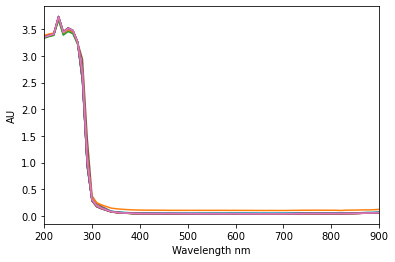

In [52]:
for i, row in blanks_spectra.iterrows():
    absorbances = list(row) 
    plt.plot(wavelengths, absorbances)
plt.xlim(200,900)
plt.xlabel('Wavelength nm')
plt.ylabel('AU')

Text(0, 0.5, 'AU')

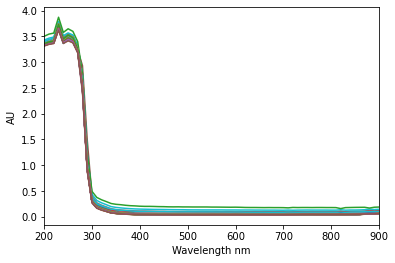

In [48]:
for i, row in full_data[0:len(blanked_samples_spectra)][wavelength_columns].iterrows():
    absorbances = list(row) 
    plt.plot(wavelengths, absorbances)
plt.xlim(200, 900)
plt.xlabel('Wavelength nm')
plt.ylabel('AU')